## Prosper Loan Exploration 
#### By Uto David


### Introduction

This project aims to analyze loan data from Prosper Marketplace, a company based in San Francisco, California, that specializes in providing peer-to-peer loans at low interest rates to borrowers. Prosper was started in 2005, and the data set covers the time period 2005 to 2014. It contains 113,937 observations of 81 variables. 

The goal is to identify the demographics of borrowers that have defaulted in some way and the effect of the default on lender's yield.

#### Preliminary wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.shape

(113937, 81)

In [5]:
pd.set_option('display.max_rows', None)
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
#checking for duplicate values in the unique identifier of my choice. 
df[df['ListingKey'].duplicated() == True].head()

ListingKey  ListingNumber            ListingCreationDate  \
9     0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999   0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539  2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942  4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5812  94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   

     CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
9            NaN    36    Current        NaN      0.07620        0.0629   
999          NaN    60    Current        NaN      0.17710        0.1535   
2539         NaN    60    Current        NaN      0.14528        0.1224   
4942         NaN    36    Current        NaN      0.35356        0.3134   
5812         NaN    36    Current        NaN      0.24205        0.2045   

      LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
9          0.0529                  0.05221         0.0099          0.04231   
999        0.1435                  0.13507         0.0599          0.07517   
2539       0.1124                  0.10731         0.0424          0.06491   
4942       0.3034                  0.27598         0.1625          0.11348   
5812       0.1945                  0.17970         0.0899          0.08980   

      ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
9                         7.0                    AA          11.0   
999                       5.0                     B           7.0   
2539                      5.0                     B          10.0   
4942                      1.0                    HR           2.0   
5812                      4.0                     C           4.0   

      ListingCategory (numeric) BorrowerState  \
9                             7            IL   
999                           1            MD   
2539                          1            NJ   
4942                          7            MI   
5812                          1            GA   

                             Occupation EmploymentStatus  \
9                          Food Service         Employed   
999                               Other         Employed   
2539  Police Officer/Correction Officer         Employed   
4942                            Laborer         Employed   
5812                                NaN            Other   

      EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
9                        269.0                 True             False   
999                      100.0                 True             False   
2539                     107.0                 True             False   
4942                     336.0                 True             False   
5812                       0.0                 True             False   

     GroupKey     DateCreditPulled  CreditScoreRangeLower  \
9         NaN  2013-12-02 10:43:39                  820.0   
999       NaN  2014-02-08 11:39:13                  760.0   
2539      NaN  2014-03-07 10:04:00                  720.0   
4942      NaN  2013-09-26 09:35:36                  640.0   
5812      NaN  2013-10-30 17:36:21                  700.0   

      CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
9                     839.0     1993-04-01 00:00:00                17.0   
999                   779.0     1994-11-01 00:00:00                16.0   
2539                  739.0     1996-07-01 00:00:00                19.0   
4942                  659.0     1978-09-01 00:00:00                 7.0   
5812                  719.0     1986-02-10 00:00:00                19.0   

      OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
9                16.0                        32.0                     12   
999              16.0                        34.0                     15   
2539             18.0                        27.0                   

In [7]:
# Confirming that there are actually duplicates.
df[df['ListingKey'] == '94B035909835592957503E6']

ListingKey  ListingNumber            ListingCreationDate  \
5811  94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   
5812  94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   

     CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
5811         NaN    36    Current        NaN      0.24205        0.2045   
5812         NaN    36    Current        NaN      0.24205        0.2045   

      LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
5811       0.1945                   0.1797         0.0899           0.0898   
5812       0.1945                   0.1797         0.0899           0.0898   

      ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
5811                      4.0                     C           3.0   
5812                      4.0                     C           4.0   

      ListingCategory (numeric) BorrowerState Occupation EmploymentStatus  \
5811                          1            GA        NaN            Other   
5812                          1            GA        NaN            Other   

      EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
5811                       0.0                 True             False   
5812                       0.0                 True             False   

     GroupKey     DateCreditPulled  CreditScoreRangeLower  \
5811      NaN  2013-10-30 17:36:21                  700.0   
5812      NaN  2013-10-30 17:36:21                  700.0   

      CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
5811                  719.0     1986-02-10 00:00:00                19.0   
5812                  719.0     1986-02-10 00:00:00                19.0   

      OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
5811             18.0                        35.0                     16   
5812             18.0                        35.0                     16   

      OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
5811                       1383.0                   0.0             0.0   
5812                       1383.0                   0.0             0.0   

      CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
5811                   0.0               0.0                      0.0   
5812                   0.0               0.0                      0.0   

      PublicRecordsLast10Years  PublicRecordsLast12Months  \
5811                       0.0                        0.0   
5812                       0.0                        0.0   

      RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
5811                 47018.0                 0.96                   1513.0   
5812                 47018.0                 0.96                   1513.0   

      TotalTrades  TradesNeverDelinquent (percentage)  \
5811         34.0                                 1.0   
5812         34.0                                 1.0   

      TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  \
5811                      2.0               0.62  $50,000-74,999   
5812                      2.0               0.62  $50,000-74,999   

      IncomeVerifiable  StatedMonthlyIncome                  LoanKey  \
5811              True          4166.666667  129C369881799628360C904   
5812              True          4166.666667  129C369881799628360C904   

      TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  \
5811                NaN                         NaN                    NaN   
5812                NaN                         NaN                    NaN   

      ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  \
5811                                  NaN                              NaN   
5812                                  NaN                              NaN   

      ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  \
5811                       Na

#### Data Issues

1. There are duplicates in listing key which is the unique identifier I chose.
2. Most NaN values are strings.
3. Loan origination date is object datatype.
4. Listing category as numeric.

#### Data Cleaning

In [8]:
# Let's drop the duplicate rows
df.drop_duplicates(subset = "ListingKey",keep = 'first',inplace = True)
print("Number of rows after dropping duplicates:", len(df))

Number of rows after dropping duplicates: 113066


since the NaN values are strings, let's make them null values.

In [9]:
df = df.replace({'NaN': np.NaN})

In [10]:
#check to see if its done
if (df == 'NaN').any().any():
    print("The replacement was not successful.")
else:
    print("All 'NaN' values were successfully replaced with np.NaN.")

All 'NaN' values were successfully replaced with np.NaN.


In [11]:
# change date datatype to datetime
df['LoanOriginationDate'] = df['LoanOriginationDate'].apply(pd.to_datetime)

I will also replace the numerical listing category with its alphabetical counterpart

In [12]:
# Create a function that will replace the values with a text
def replace_numerical_with_text(df, column_name, value_dict):
    df[column_name].replace(value_dict, inplace=True)

In [13]:
#Replace the values in the ListingCategory column
value_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 
              5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
              11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
              15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

replace_numerical_with_text(df, 'ListingCategory (numeric)', value_dict)

In [14]:
df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    57624
Not Available         16965
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [15]:
# rename listing category
df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [16]:
df['IncomeRange'] = df['IncomeRange'].replace('Not employed', '$0')
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed'])
df['IncomeRange'] = df['IncomeRange'].astype(ordered_cat)


### What is the structure of your dataset?

The data set contained 113937 rows prior to wrangling where I dropped duplicate rows of *ListingKey* column. Now it is a dataset of 113066 rows, 81 columns.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are delinquency and demographic variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'll use the following features to support my investigation:
'ListingKey', 'MemberKey', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
 'ListingCategory', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'LoanCurrentDaysDelinquent',
 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'Term', 'LoanStatus', 'IncomeRange', 'IncomeVerifiable',   'StatedMonthlyIncome', 'LenderYield'.          

In [17]:
viz_df = df[['ListingKey','MemberKey','BorrowerState','Occupation','EmploymentStatus',
             'EmploymentStatusDuration','IsBorrowerHomeowner','ListingCategory','CurrentDelinquencies','LoanOriginationDate',
            'BorrowerRate','MonthlyLoanPayment','LoanOriginalAmount','AmountDelinquent','DelinquenciesLast7Years','LoanCurrentDaysDelinquent','CreditScoreRangeLower','CreditScoreRangeUpper',
            'Term','LoanStatus','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','LenderYield']]            

In [18]:
viz_df.head()

ListingKey                MemberKey BorrowerState  \
0  1021339766868145413AB3B  1F3E3376408759268057EDA            CO   
1  10273602499503308B223C1  1D13370546739025387B2F4            CO   
2  0EE9337825851032864889A  5F7033715035555618FA612            GA   
3  0EF5356002482715299901A  9ADE356069835475068C6D2            GA   
4  0F023589499656230C5E3E2  36CE356043264555721F06C            MN   

      Occupation EmploymentStatus  EmploymentStatusDuration  \
0          Other    Self-employed                       2.0   
1   Professional         Employed                      44.0   
2          Other    Not available                       NaN   
3  Skilled Labor         Employed                     113.0   
4      Executive         Employed                      44.0   

   IsBorrowerHomeowner   ListingCategory  CurrentDelinquencies  \
0                 True     Not Available                   2.0   
1                False  Home Improvement                   0.0   
2                False     Not Available                   1.0   
3                 True        Motorcycle                   4.0   
4                 True  Home Improvement                   0.0   

  LoanOriginationDate  BorrowerRate  MonthlyLoanPayment  LoanOriginalAmount  \
0          2007-09-12        0.1580              330.43                9425   
1          2014-03-03        0.0920              318.93               10000   
2          2007-01-17        0.2750              123.32                3001   
3          2012-11-01        0.0974              321.45               10000   
4          2013-09-20        0.2085              563.97               15000   

   AmountDelinquent  DelinquenciesLast7Years  LoanCurrentDaysDelinquent  \
0             472.0                      4.0                          0   
1               0.0                      0.0                          0   
2               NaN                      0.0                          0   
3           10056.0                     14.0                          0   
4               0.0                      0.0                          0   

   CreditScoreRangeLower  CreditScoreRangeUpper  Term LoanStatus  \
0                  640.0                  659.0    36  Completed   
1                  680.0                  699.0    36    Current   
2                  480.0                  499.0    36  Completed   
3                  800.0                  819.0    36    Current   
4                  680.0                  699.0    36    Current   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  LenderYield  
0  $25,000-49,999              True          3083.333333       0.1380  
1  $50,000-74,999              True          6125.000000       0.0820  
2   Not displayed              True          2083.333333       0.2400  
3  $25,000-49,999              True          2875.000000       0.0874  
4       $100,000+              True          9583.333333       0.1985

In [19]:
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 113066 non-null  object        
 1   MemberKey                  113066 non-null  object        
 2   BorrowerState              107551 non-null  object        
 3   Occupation                 109537 non-null  object        
 4   EmploymentStatus           110811 non-null  object        
 5   EmploymentStatusDuration   105441 non-null  float64       
 6   IsBorrowerHomeowner        113066 non-null  bool          
 7   ListingCategory            113066 non-null  object        
 8   CurrentDelinquencies       112369 non-null  float64       
 9   LoanOriginationDate        113066 non-null  datetime64[ns]
 10  BorrowerRate               113066 non-null  float64       
 11  MonthlyLoanPayment         113066 non-null  float64 

I will like to have the full names of the states also in the dataframe to enhance readability of my plots. I have a csv file of this, so I'll read it and merge with my dataframe

In [20]:
# Let's make a copy of the dataframe to use for visualization
viz_copy = viz_df.copy()

In [21]:
#reading in the states data.
states = pd.read_csv('data.csv')
states.head()

state  abbrev code
0     Alabama    Ala.   AL
1      Alaska  Alaska   AK
2     Arizona   Ariz.   AZ
3    Arkansas    Ark.   AR
4  California  Calif.   CA

In [22]:
#merging the states data to the loan dataframe.
viz = pd.merge(viz_copy,states, left_on = 'BorrowerState', right_on = 'code' )
viz.head()

ListingKey                MemberKey BorrowerState  \
0  1021339766868145413AB3B  1F3E3376408759268057EDA            CO   
1  10273602499503308B223C1  1D13370546739025387B2F4            CO   
2  0F5034867864161084F3789  B39A347662239828607EAC0            CO   
3  0F8B3577039176552F6CC26  78E3342690661185038B6FA            CO   
4  10803531522293214B198DF  E1243530639796312A41AD5            CO   

     Occupation EmploymentStatus  EmploymentStatusDuration  \
0         Other    Self-employed                       2.0   
1  Professional         Employed                      44.0   
2     Executive        Full-time                      10.0   
3  Professional         Employed                      90.0   
4  Construction         Employed                       5.0   

   IsBorrowerHomeowner     ListingCategory  CurrentDelinquencies  \
0                 True       Not Available                   2.0   
1                False    Home Improvement                   0.0   
2                 True  Debt Consolidation                   0.0   
3                 True  Debt Consolidation                   0.0   
4                 True               Other                   0.0   

  LoanOriginationDate  BorrowerRate  MonthlyLoanPayment  LoanOriginalAmount  \
0          2007-09-12        0.1580              330.43                9425   
1          2014-03-03        0.0920              318.93               10000   
2          2010-06-24        0.0920                0.00                4000   
3          2013-05-13        0.1299              505.34               15000   
4          2011-11-18        0.3199              174.20                4000   

   AmountDelinquent  DelinquenciesLast7Years  LoanCurrentDaysDelinquent  \
0             472.0                      4.0                          0   
1               0.0                      0.0                          0   
2               0.0                      0.0                          0   
3               0.0                      0.0                          0   
4               0.0                      0.0                          0   

   CreditScoreRangeLower  CreditScoreRangeUpper  Term LoanStatus  \
0                  640.0                  659.0    36  Completed   
1                  680.0                  699.0    36    Current   
2                  700.0                  719.0    36  Completed   
3                  680.0                  699.0    36    Current   
4                  700.0                  719.0    36  Completed   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  LenderYield  \
0  $25,000-49,999              True          3083.333333       0.1380   
1  $50,000-74,999              True          6125.000000       0.0820   
2  $75,000-99,999              True          6666.666667       0.0820   
3  $50,000-74,999              True          5416.666667       0.1199   
4  $75,000-99,999              True          6250.000000       0.3099   

      state abbrev code  
0  Colorado  Colo.   CO  
1  Colorado  Colo.   CO  
2  Colorado  Colo.   CO  
3  Colorado  Colo.   CO  
4  Colorado  Colo.   CO

In [23]:
# Rename columns 
viz = viz.rename(columns={'BorrowerState': 'BorrowerStateCode', 'state': 'BorrowerState'})
# Drop the redundant columns
viz.drop(columns = ['abbrev','code'], inplace=True)

In [24]:
# Testing for the changes made.
viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107551 entries, 0 to 107550
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 107551 non-null  object        
 1   MemberKey                  107551 non-null  object        
 2   BorrowerStateCode          107551 non-null  object        
 3   Occupation                 105409 non-null  object        
 4   EmploymentStatus           106683 non-null  object        
 5   EmploymentStatusDuration   103701 non-null  float64       
 6   IsBorrowerHomeowner        107551 non-null  bool          
 7   ListingCategory            107551 non-null  object        
 8   CurrentDelinquencies       107479 non-null  float64       
 9   LoanOriginationDate        107551 non-null  datetime64[ns]
 10  BorrowerRate               107551 non-null  float64       
 11  MonthlyLoanPayment         107551 non-null  float64 

### Univariate Visualizations

### LoanStatus

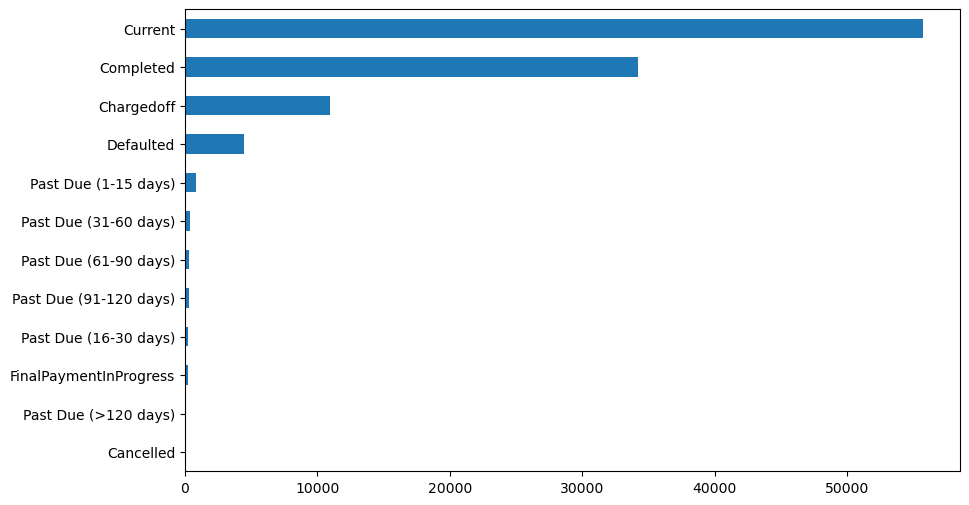

In [25]:
viz['LoanStatus'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (10,6));

Borrowers with ongoing contract are the highest in data for obvious reasons. But I'm much more interested in the population that have defaulted in some way. I'll create a column to categorize them for better visualization

“In the United States, Federal regulations require creditors to charge-off installment loans after 120 days of delinquency, while revolving credit accounts must be charged-off after 180 days.”–Wikipedia

A loan is said to be **canceled** when the borrower has fully paid off the loan amount and all associated interest and fees.A loan may also be cancelled or forgiven if the borrower meets certain conditions, such as if they become permanently disabled or if the loan was a student loan and they work in a public service job for a specified period of time.

So, I will group Current/FinalPaymentInProgress/Completed/cancelled into ‘GoodStanding’; group all the past due within 120 days into “Delinquent”; group Past Due (>120 days)/Chargedoff/Defaulted into “Defaulted.” I named this new variable as NewLoanStatus.


In [26]:
# Create a new loan status  column categoring  with simpler categories
viz['NewLoanStatus'] = viz['LoanStatus'].replace({
    'Current': 'GoodStanding',
    'Completed': 'GoodStanding',
    'Chargedoff': 'Defaulted',
    'Defaulted': 'Defaulted',
    'Past Due (1-15 days)': 'Delinquent',
    'Past Due (16-30 days)': 'Delinquent',
    'Past Due (31-60 days)': 'Delinquent',
    'Past Due (61-90 days)': 'Delinquent',
    'Past Due (91-120 days)': 'Delinquent',
    'Past Due (>120 days)': 'Defaulted',
    'FinalPaymentInProgress': 'GoodStanding',
    'Cancelled': 'GoodStanding'
})

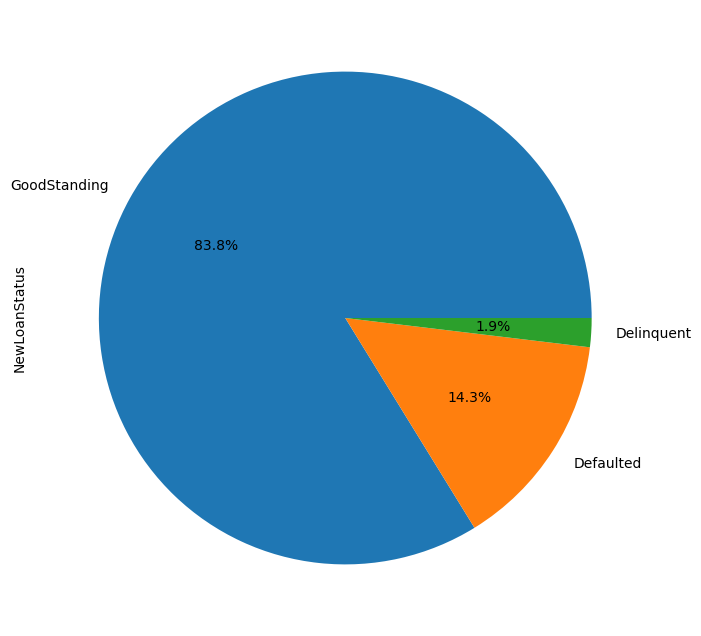

In [27]:
viz['NewLoanStatus'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8));

83.8% of borrowers are in good standing which is good for Prosper Loans. Let's zoom into the 14.3% defaulted borrowers and 1.9% 
delinquent borrowers.

To do this, I'll create a dataframe excluding borrowers that are in good standing.

In [28]:
new_viz = viz[viz['NewLoanStatus'] != 'GoodStanding']
new_viz.shape

(17438, 26)

In [29]:
new_viz.describe()

EmploymentStatusDuration  CurrentDelinquencies  BorrowerRate  \
count              15389.000000          17396.000000  17438.000000   
mean                  83.113783              1.361060      0.233799   
std                   86.392522              3.393814      0.071786   
min                    0.000000              0.000000      0.000000   
25%                   21.000000              0.000000      0.176800   
50%                   54.000000              0.000000      0.240000   
75%                  117.000000              1.000000      0.290000   
max                  755.000000             83.000000      0.360000   

       MonthlyLoanPayment  LoanOriginalAmount  AmountDelinquent  \
count        17438.000000        17438.000000      15389.000000   
mean           240.804290         6678.981707       1403.429008   
std            189.632024         5529.810814       7617.391312   
min              0.000000         1000.000000          0.000000   
25%            114.310000         3000.000000          0.000000   
50%            173.710000         4576.000000          0.000000   
75%            319.395000         9000.000000         44.000000   
max           1552.760000        35000.000000     444745.000000   

       DelinquenciesLast7Years  LoanCurrentDaysDelinquent  \
count             17312.000000               17438.000000   
mean                  5.628235                 862.065776   
std                  11.935962                 756.339885   
min                   0.000000                   1.000000   
25%                   0.000000                 199.000000   
50%                   0.000000                 553.000000   
75%                   6.000000                1600.000000   
max                  99.000000                2704.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper          Term  \
count           17438.000000           17438.000000  17438.000000   
mean              651.076958             670.076958     38.562679   
std                83.265759              83.265759      7.811417   
min                 0.000000              19.000000     12.000000   
25%               620.000000             639.000000     36.000000   
50%               660.000000             679.000000     36.000000   
75%               700.000000             719.000000     36.000000   
max               860.000000             879.000000     60.000000   

       StatedMonthlyIncome   LenderYield  
count         17438.000000  17438.000000  
mean           4571.158299      0.223206  
std            3813.022044      0.071657  
min               0.000000     -0.010000  
25%            2500.000000      0.165000  
50%            3818.833333      0.230000  
75%            5666.666667      0.285000  
max          208333.333333      0.340000

#### Stated monthly income of defaulters

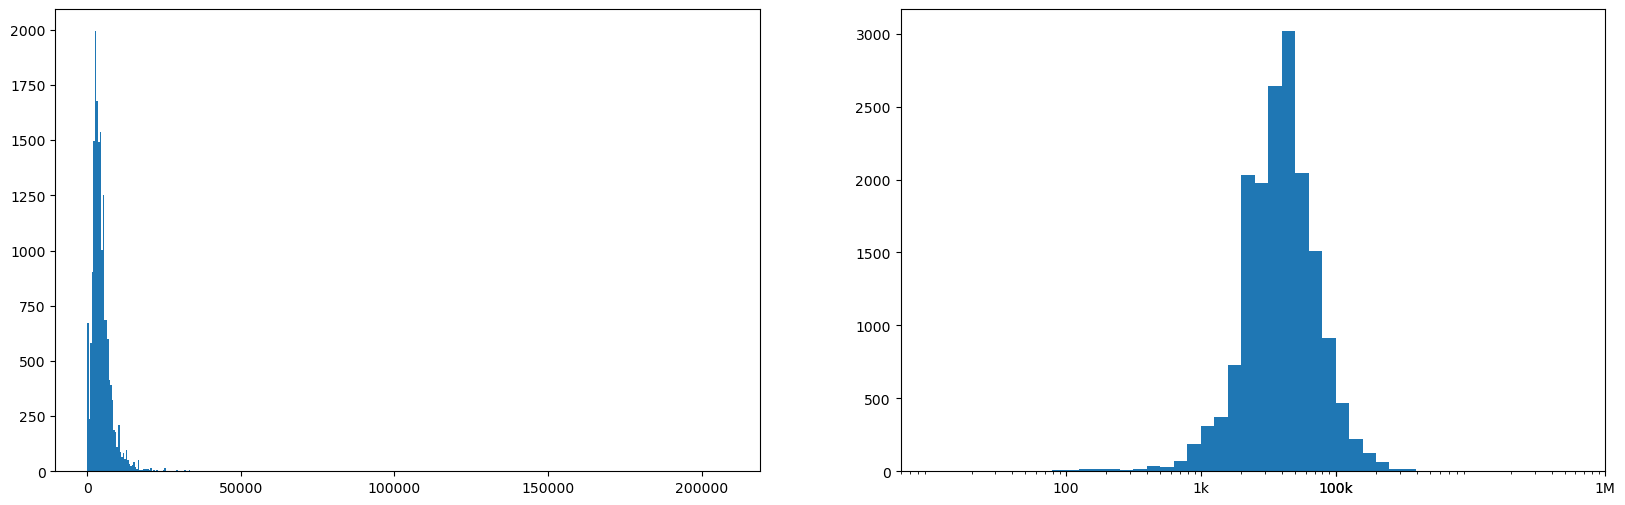

In [32]:
# Distribution of stated monthly income
plt.figure(figsize = [20, 6]) 

# Using the maximum value as bin
plt.subplot(1, 2, 1)
bins = np.arange(0, new_viz['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = new_viz, x = 'StatedMonthlyIncome', bins = bins);


# Zooming into the histogram using log transformation
plt.subplot(1, 2, 2)
bins = 10 ** np.arange(1, 5.5+0.1, 0.1)

plt.hist(data = new_viz, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log');
plt.xticks([10e1, 10e2, 10e3, 1e4, 10e5], 
           ['100', '1k', '10k', '100k', '1M']);


Owing to the skewness of the histogram, I had to do a log transformation to help correct the distribution of the variables. I used `np.log10(new_viz['StatedMonthlyIncome'].describe())` to get the lower and upper limits of the x-axis scale.  


From the transformed plot, it can be seen that the monthly salary of the group under review peaks between 4000 and 5000 US Dollars.

#### Listing Category

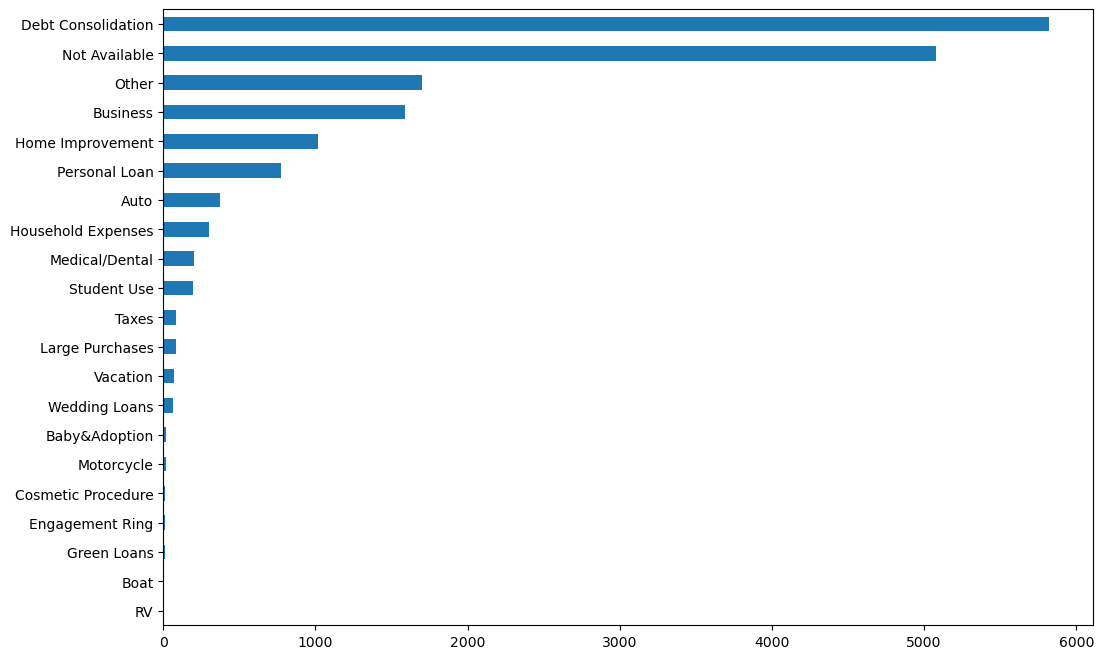

In [33]:
new_viz['ListingCategory'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (12,8));

It can be seen that most of the borrowers get money to pay off their debts.

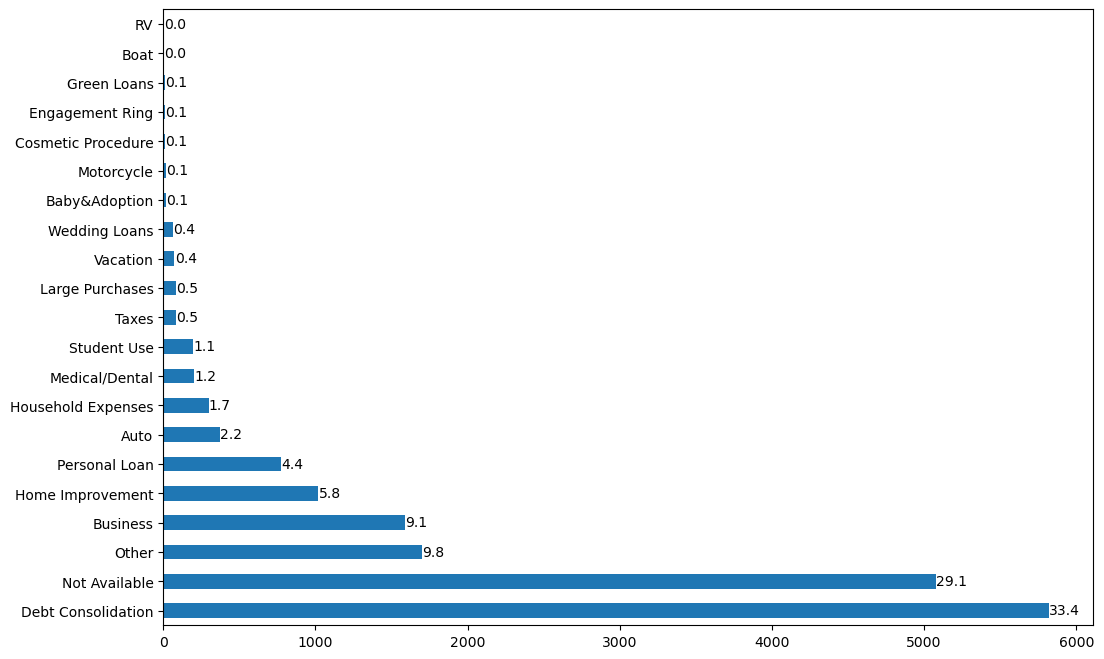

In [34]:
type_counts = new_viz['ListingCategory'].value_counts()
# Returns the sum of all not-null values in `type` column
n_listing = new_viz['ListingCategory'].value_counts().sum()

new_viz['ListingCategory'].value_counts().plot(kind = 'barh', figsize = (12,8));

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_listing)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

#### Distribution of home owners

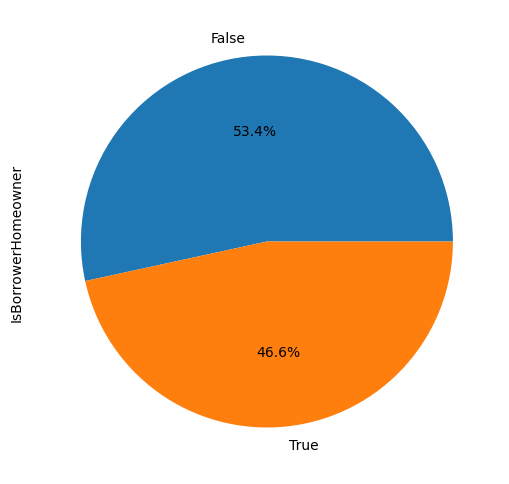

In [35]:
new_viz['IsBorrowerHomeowner'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (6,8));

#### What is the distribution of borrowers accross the states

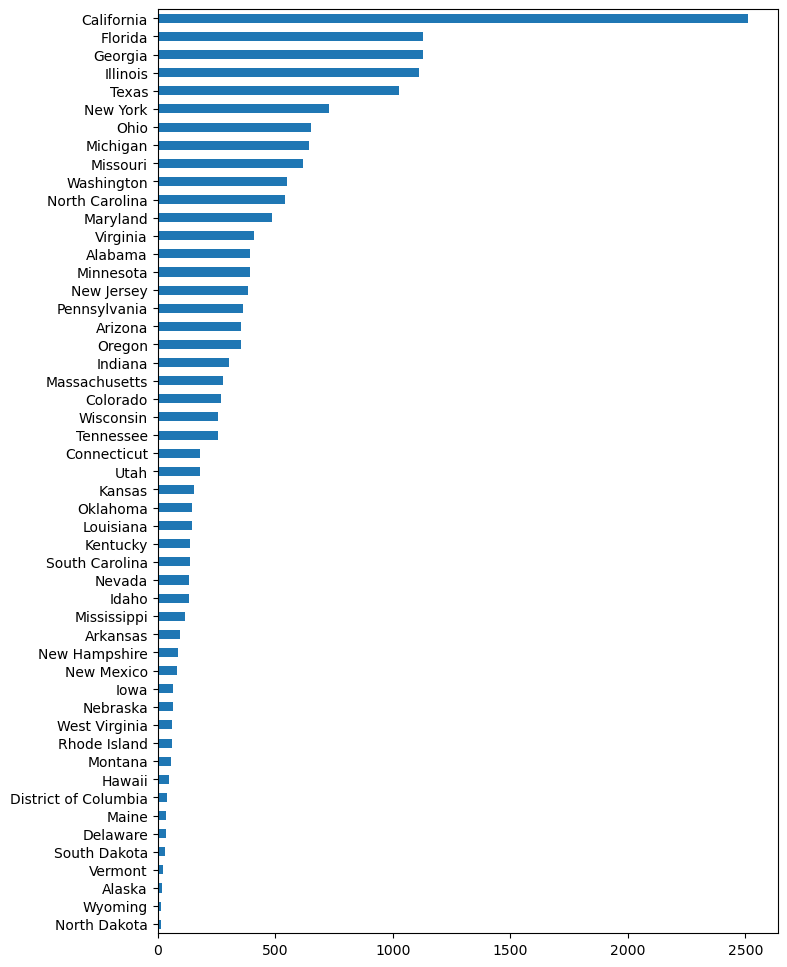

In [36]:
new_viz['BorrowerState'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (8,12));

California has the highest distribution of defaulters/borrowers and the least state is North Dakota.

#### Occupation

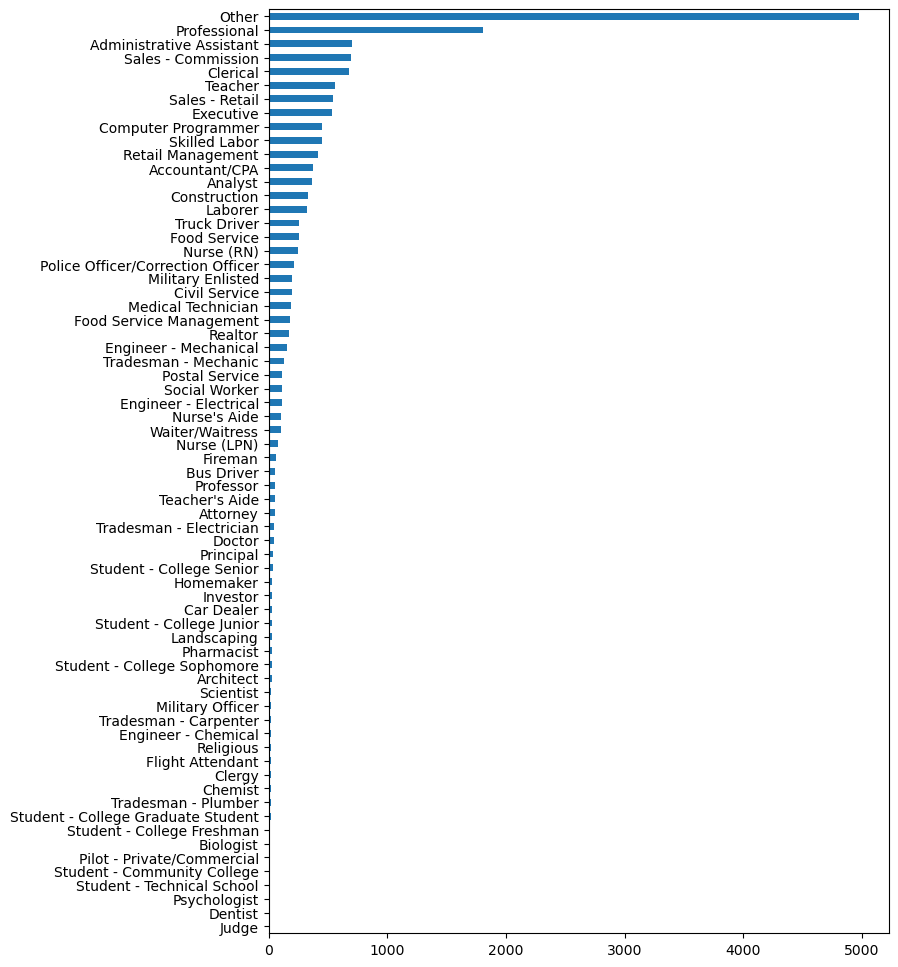

In [37]:
new_viz['Occupation'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (8,12));

#### Employment Status

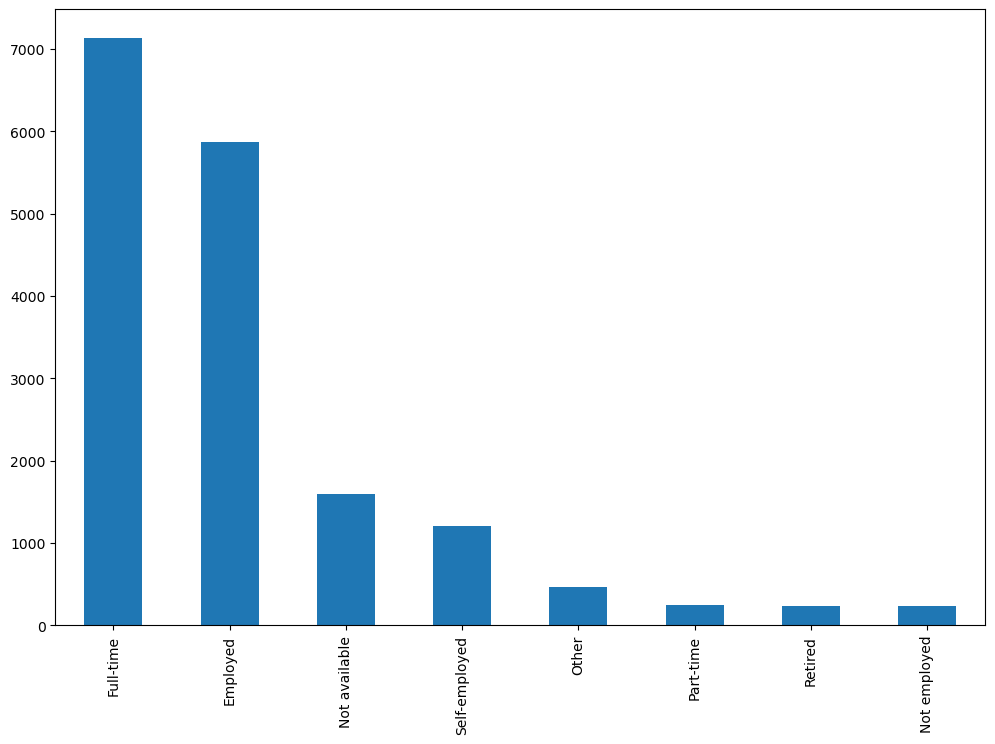

In [38]:
new_viz['EmploymentStatus'].value_counts().plot(kind = 'bar', figsize = (12,8));

It is really interesting to see that a majority of defaulters are full-time employees and the least are not employed. I'll look at the employment duration to see if this is related to a low employment duration

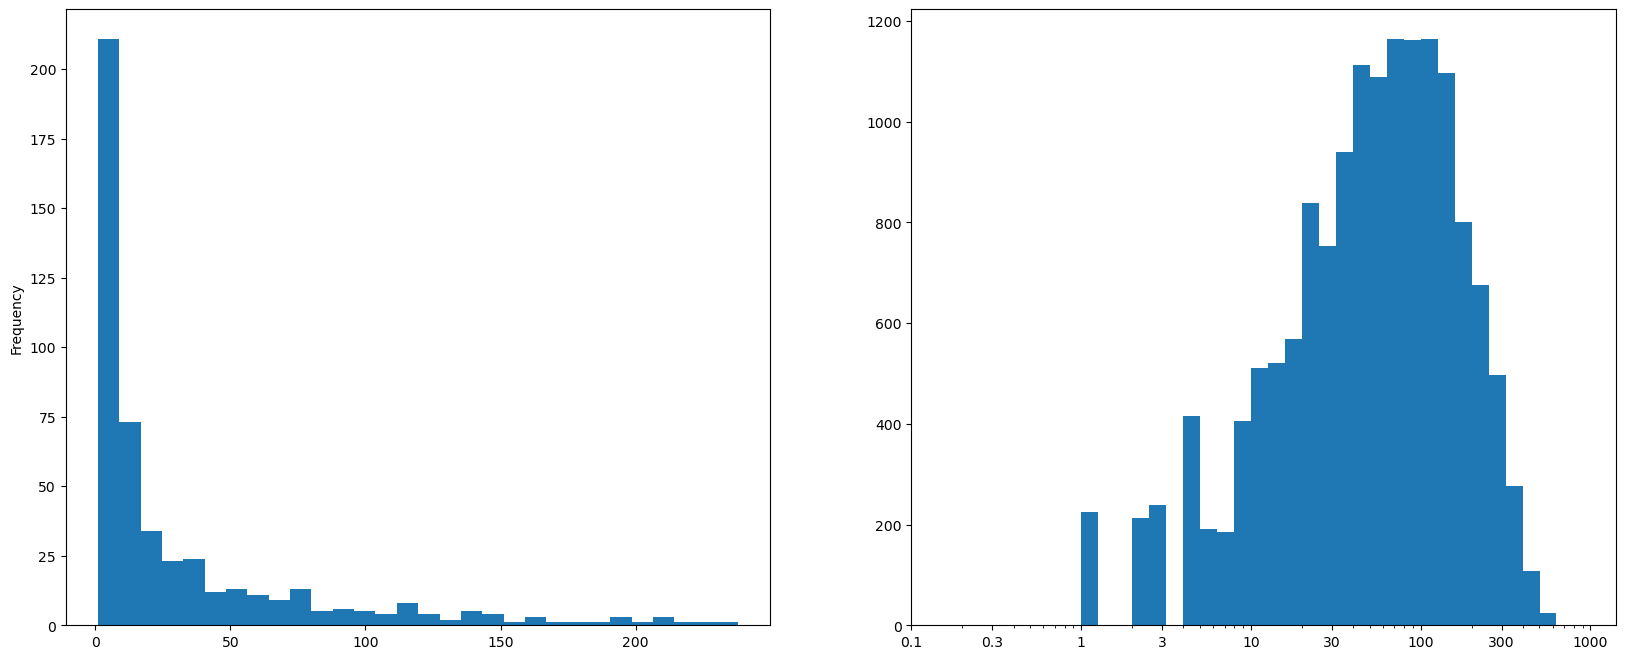

In [42]:
plt.figure(figsize = [20, 8])
plt.subplot(1, 2, 1)
new_viz['EmploymentStatusDuration'].value_counts().plot(kind = 'hist',bins = 30);

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(0, 3+0.1, 0.1)
# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displayed long the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = new_viz, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);

Majority of the defaulters have been employed within 50 to 100 months which is above 4 years of employment. This means that most of the defaulters were not newly employed. 

#### Delinquencies in the last 7 years

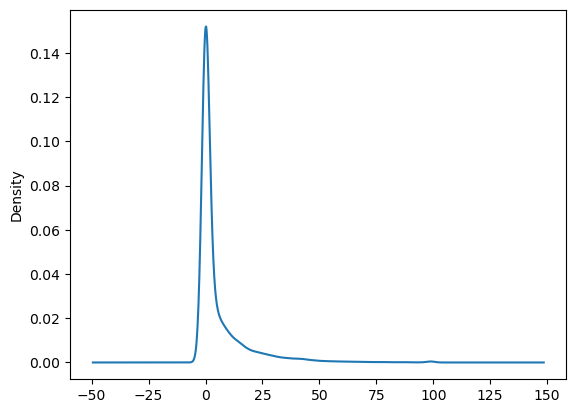

In [40]:
new_viz['DelinquenciesLast7Years'].plot( kind = 'density');

#### Income range distribution

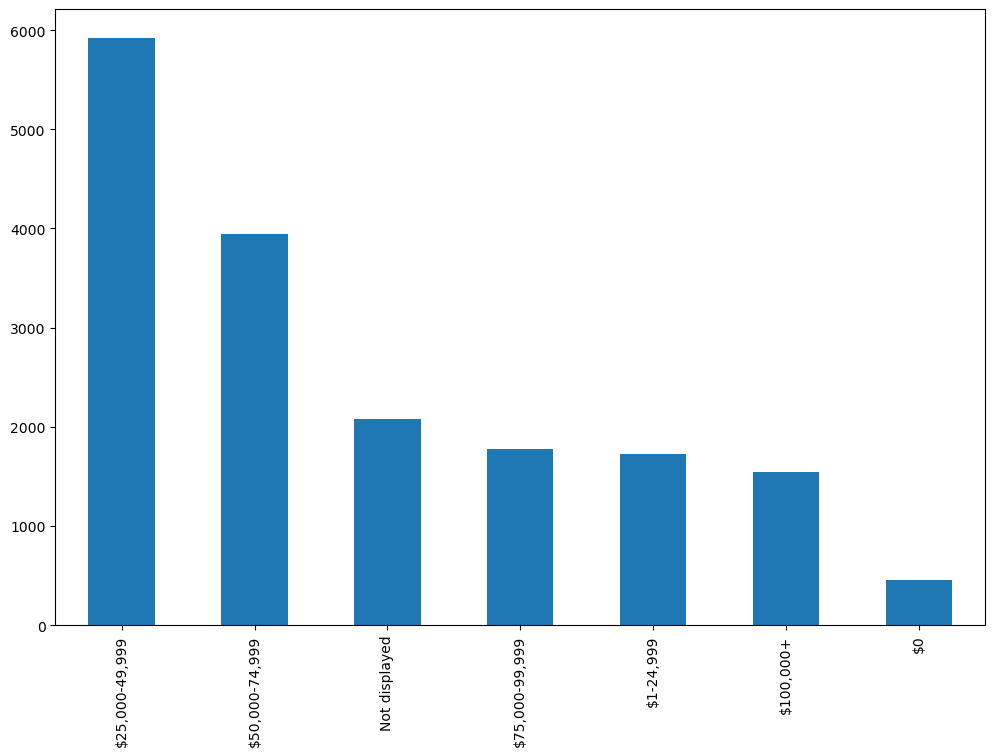

In [41]:
new_viz['IncomeRange'].value_counts().plot(kind = 'bar', figsize = (12,8));

The highest range is between 25,000 to 49,999 US Dollars

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. The variables I was interested had fairly good structure but for the fact that they were quite a number of NaN values like EmploymentStatusDuration had 7625. I didn't drop tha NaN values because it would have affected the distribution of LoanStatus column which is my main column of interest.
2. I read in a data set that contains full names of the states in the dataset which I merged with the loan data. I did that so I could use the state names instead of the abbreviations.
3. I also converted all NaN that were strings to np.NaN.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. 83.8% of borrowers are in good standing with the company while 1.9% are delinquent and 14.3% have been catgorized as defaulted.
2. I created a new column `NewLoanColumn` that better summarized the loan status column and a new dataframe `new_viz` which excluded the borrowers in goodstanding.
3. Monthly income was right skewed , so I did a log transformation to correct outliers and better understand the distribution.
4. Borrowers(33.4%) got loans for debt consolidation.
5. 46.6% of my borrowers of interest are home owners and 53.4% are not.
6. California has the highest number of borrowers.

###  Bivariate plots

In [43]:
numeric_vars = ['EmploymentStatusDuration', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
                'LoanCurrentDaysDelinquent', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'Term','StatedMonthlyIncome',
               'LenderYield', 'BorrowerRate','MonthlyLoanPayment','LoanOriginalAmount']
bool_vars = [ 'IncomeVerifiable', 'IsBorrowerHomeowner']
ordered_categoric_vars = ['IncomeRange']
categorical_data = ['ListingKey','MemberKey','BorrowerState','Occupation','EmploymentStatus',
             'EmploymentStatusDuration','ListingCategory','LoanStatus','NewLoanSatus']
datetime = ['LoanOriginationDate']

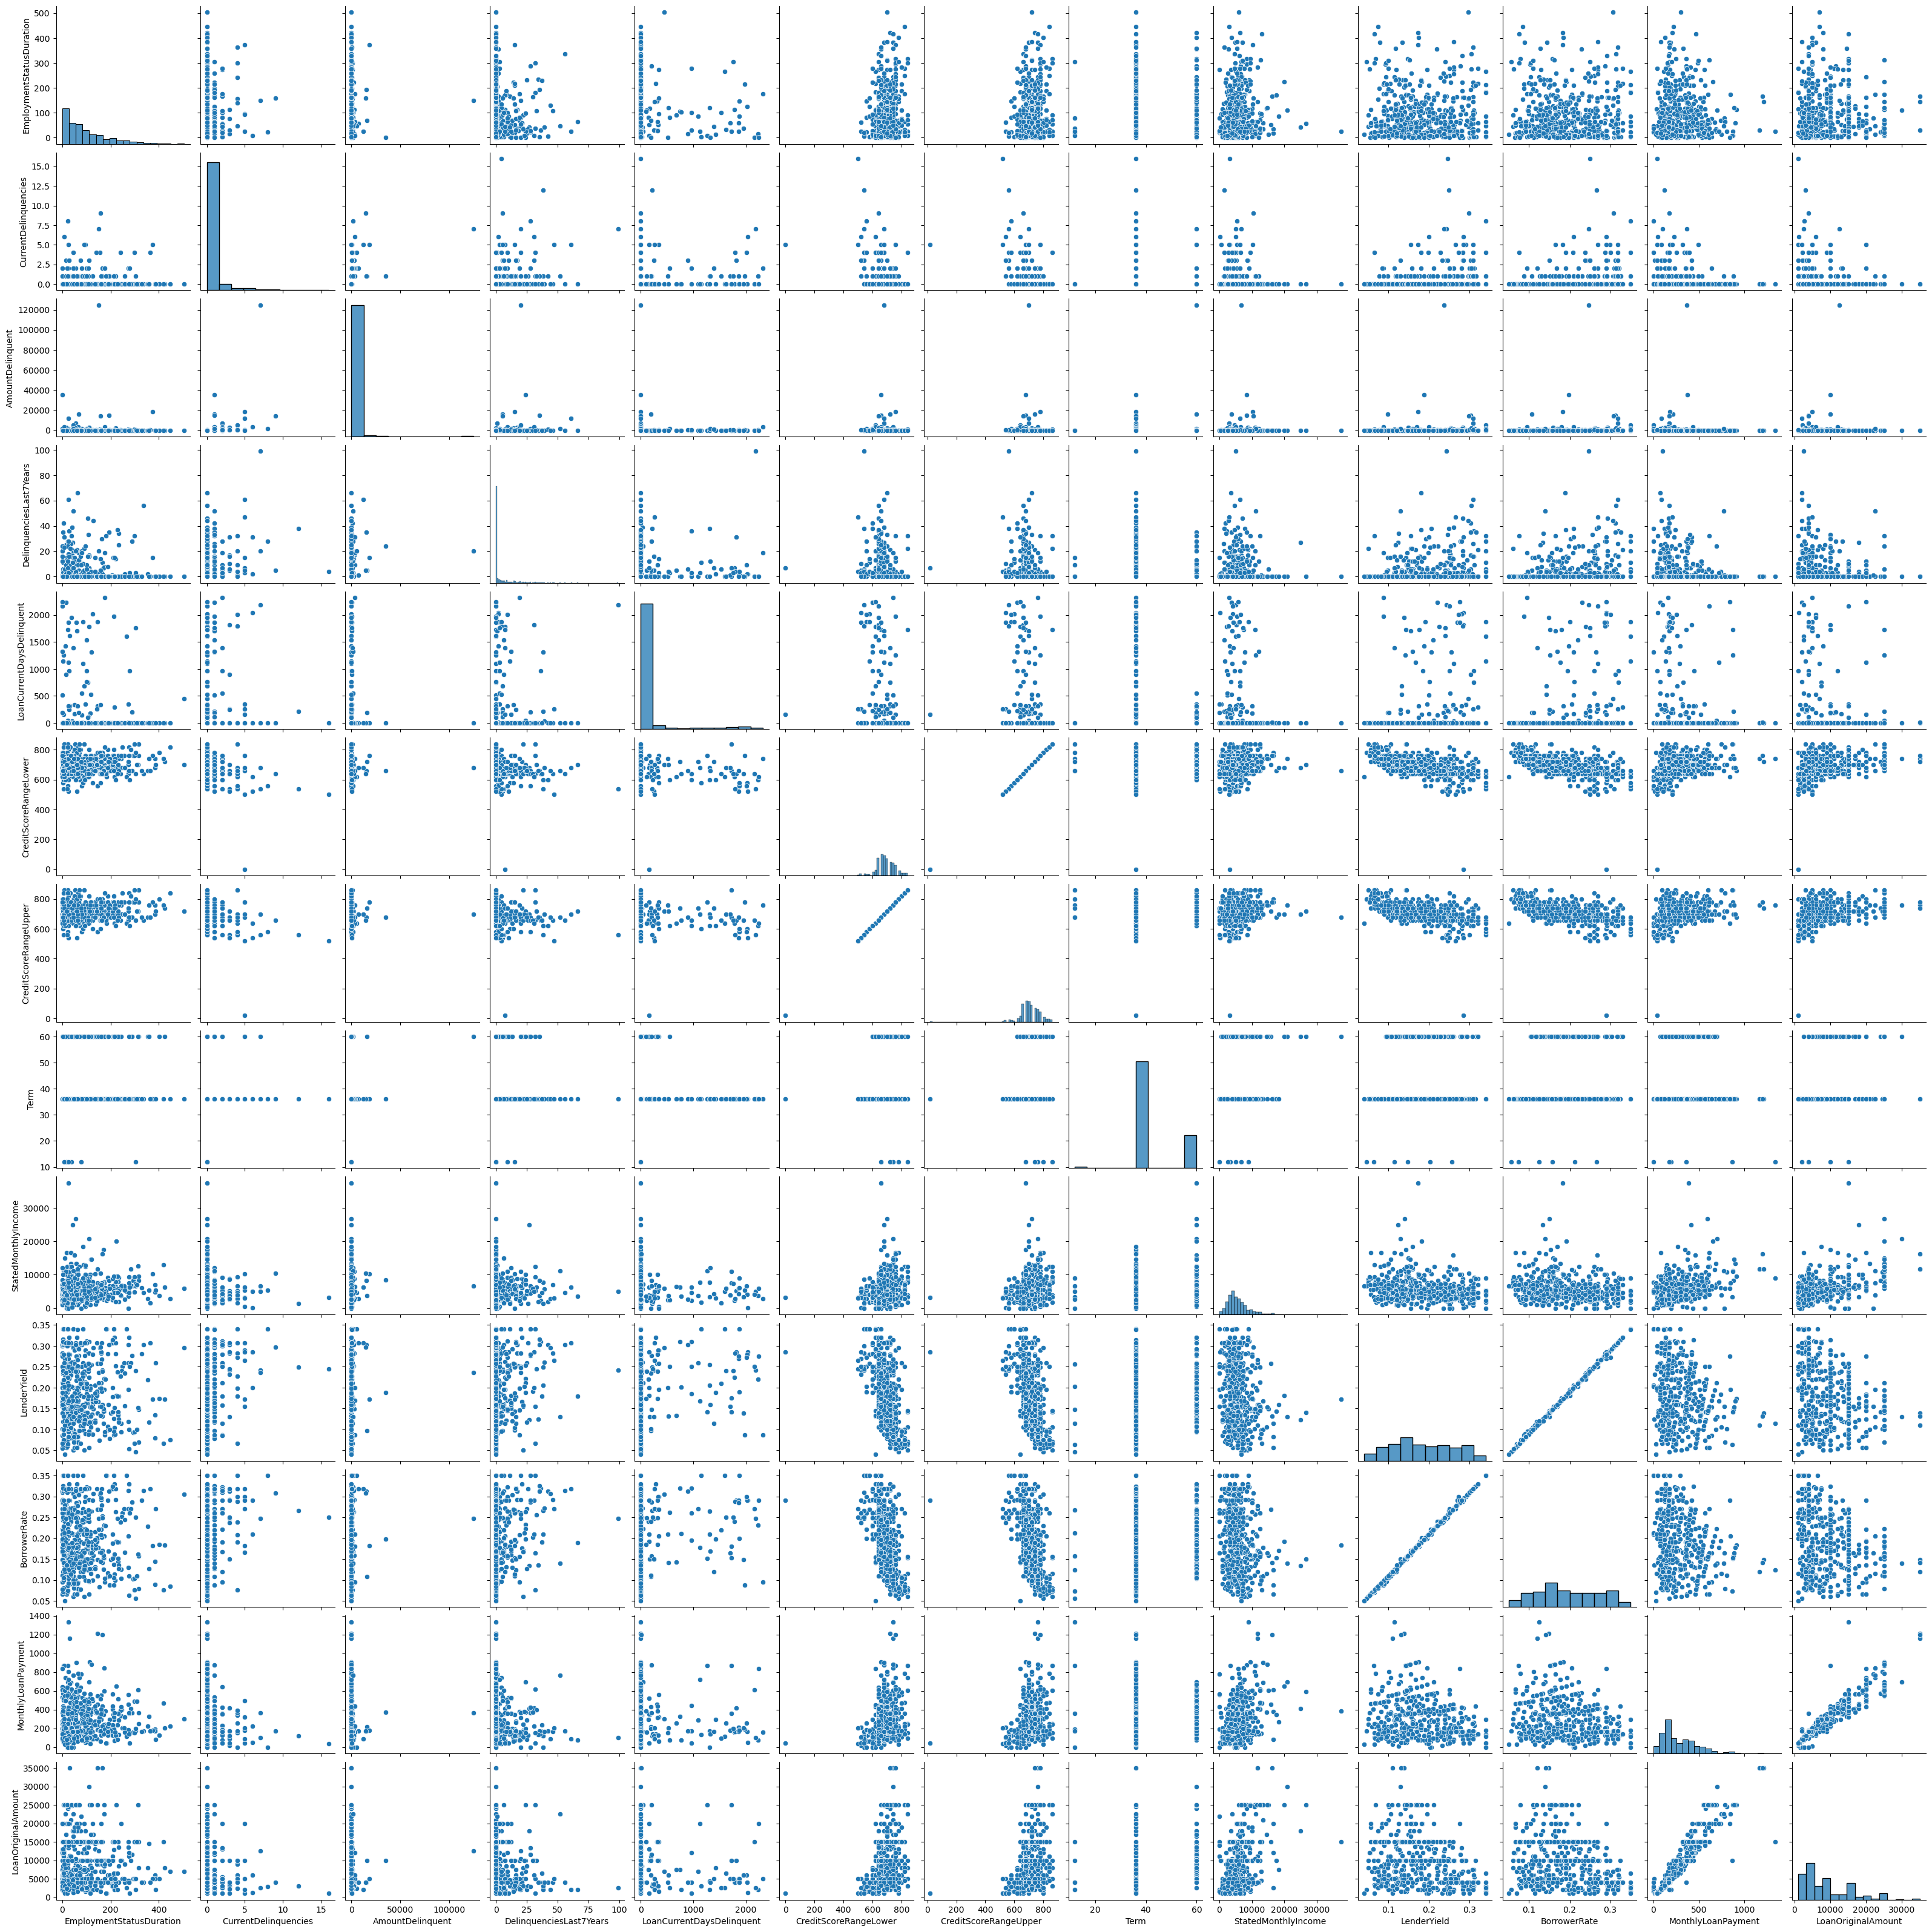

In [44]:
# pairplot of numeric vars to see relationships overview on a sample of data for faster rendering
sample = np.random.choice(new_viz.shape[0], 500, replace = False)
df_samp = df.iloc[sample,:]
sns.pairplot(df_samp, vars = numeric_vars);

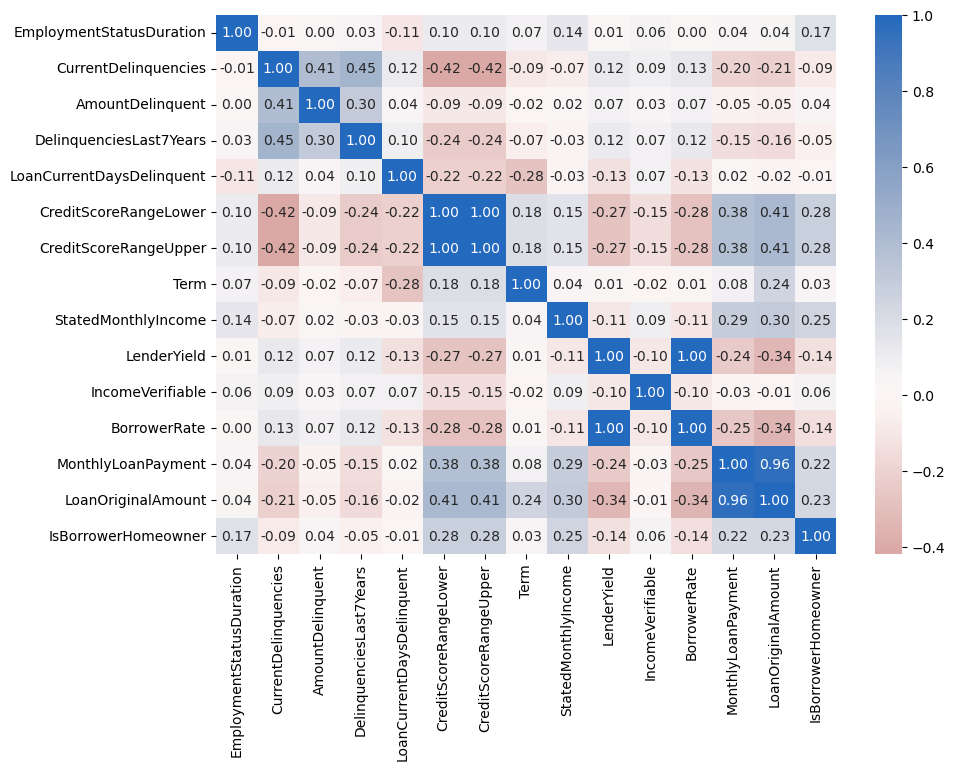

In [45]:
# correlations
plt.figure(figsize = [10, 7])
sns.heatmap(new_viz[['EmploymentStatusDuration', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
                'LoanCurrentDaysDelinquent', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'Term','StatedMonthlyIncome',
               'LenderYield', 'IncomeVerifiable','BorrowerRate','MonthlyLoanPayment','LoanOriginalAmount','IsBorrowerHomeowner']]
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between borrower rate and loan original amount

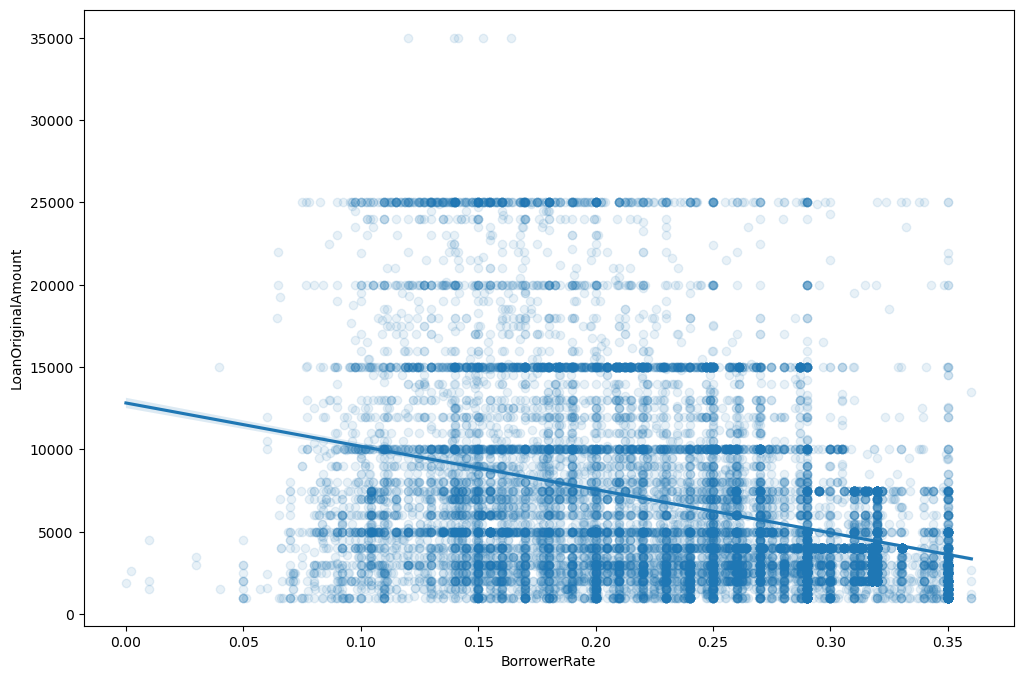

In [46]:
plt.figure(figsize = (12,8)) 
sns.regplot(data = new_viz, x = 'BorrowerRate', y = 'LoanOriginalAmount', scatter_kws={'alpha': 0.1});


In [47]:
corr = np.corrcoef(new_viz.BorrowerRate, new_viz.LoanOriginalAmount)
print("Correlation coefficient:", corr)

Correlation coefficient: [[ 1.         -0.34120868]
 [-0.34120868  1.        ]]


There is a low negative correlation between borrower rate and loan original amount. This would mean that higher loan amount have fairly low interest rates.

#### Relationship between lender yield and interest rate

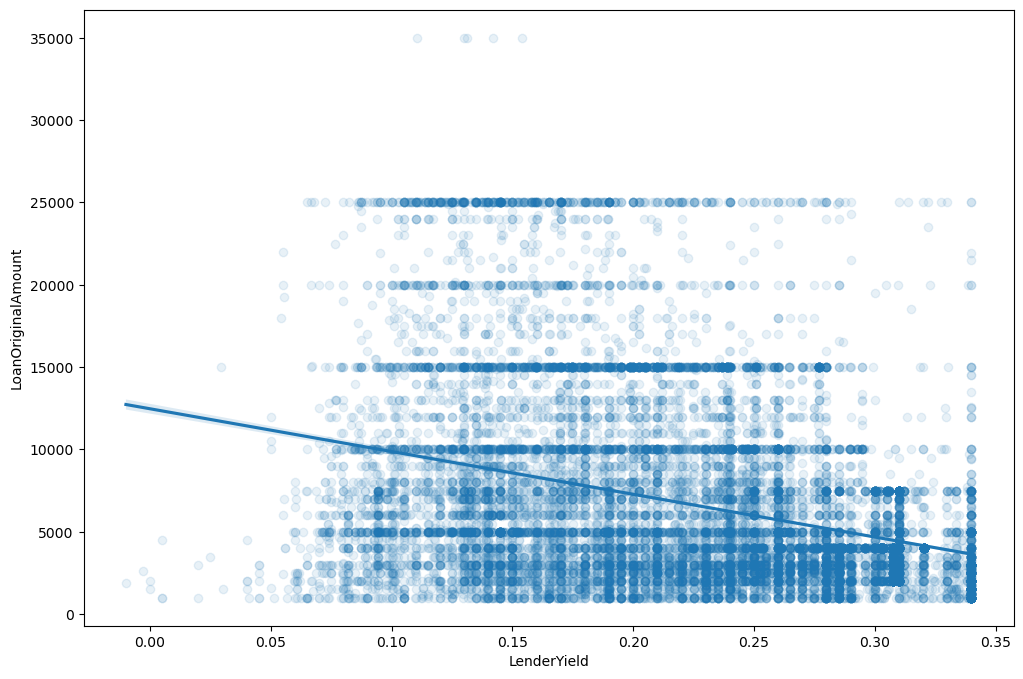

In [48]:
plt.figure(figsize = (12,8)) 
sns.regplot(data = new_viz, x = 'LenderYield', y = 'LoanOriginalAmount', scatter_kws={'alpha': 0.1});


There is also a low negative correlation between loan original and lender yield. This can be accounted for by the relationship between loan original amount and interest rate. The lower the interest rate, the lower the lender yield.

#### Relationship between lender yield and borrower rate

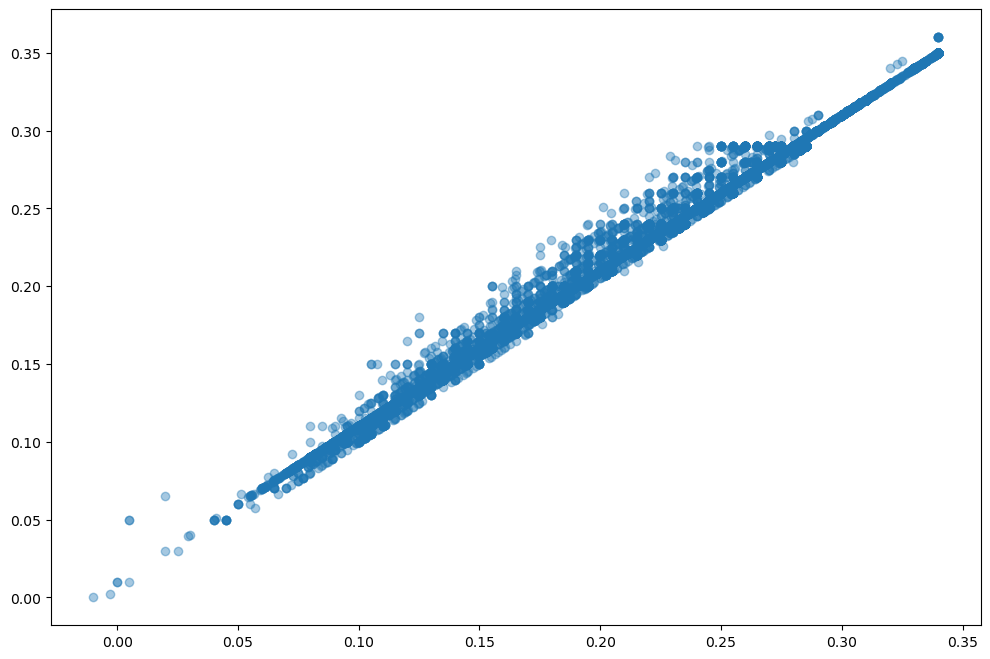

In [49]:
plt.figure(figsize = (12,8)) 
plt.scatter(data = new_viz, x = 'LenderYield', y = 'BorrowerRate',alpha = 0.4)

There is a strong positive correlation|

#### Relationship between Lender yield and delinquencies

<AxesSubplot:xlabel='DelinquenciesLast7Years', ylabel='LenderYield'>

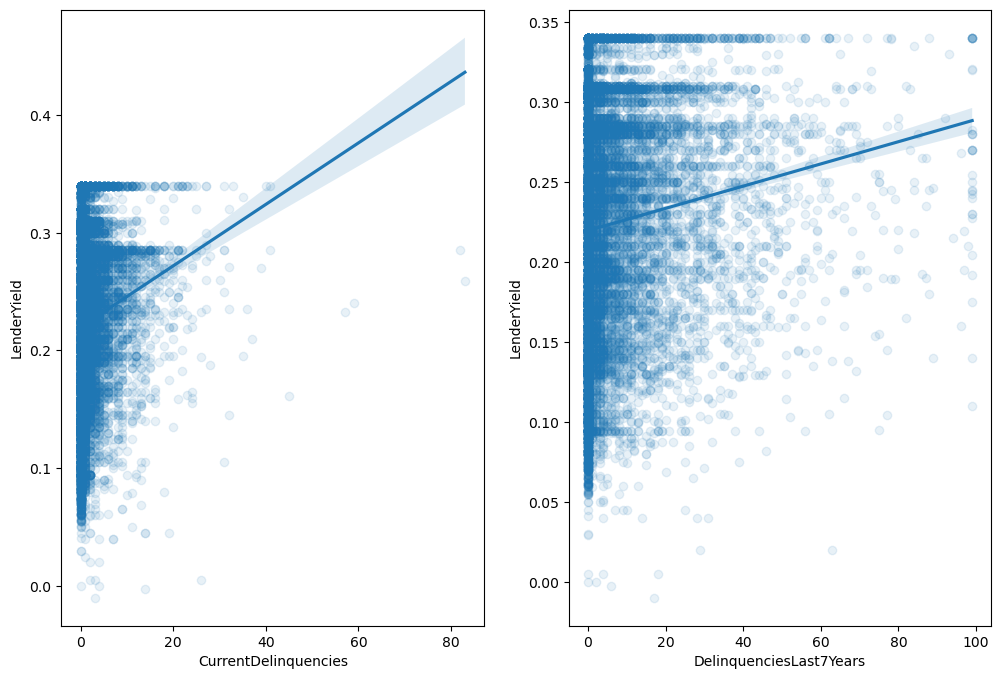

In [50]:
plt.figure(figsize = (12,8))
plt.subplot(1,2, 1)
sns.regplot(data = new_viz, x = 'CurrentDelinquencies', y = 'LenderYield', scatter_kws={'alpha': 0.1})

plt.subplot(1,2, 2)
sns.regplot(data = new_viz, x = 'DelinquenciesLast7Years', y = 'LenderYield', scatter_kws={'alpha': 0.1})


There is a weak positive correlation between lender yield and delinquencies.

#### Loan status versus Term

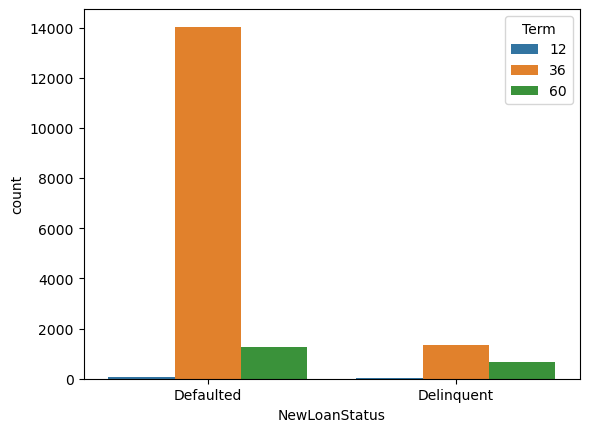

In [51]:
sns.countplot(data = new_viz, x = 'NewLoanStatus', hue = 'Term');

Loan Delinquency and Defaulted can be seen more in loans taken for 3 years

#### Who defaults more between home owners and those who are not?

In [52]:
# Use group_by() and size() to get the number of borrowers and each combination of the two variable levels as a pandas Series
homeowner = new_viz.groupby(['NewLoanStatus', 'IsBorrowerHomeowner']).size()
verifiedincome = new_viz.groupby(['NewLoanStatus', 'IncomeVerifiable']).size()

In [53]:
# Use Series.reset_index() to convert a series into a dataframe object
homeowner = homeowner.reset_index(name='count')
verifiedincome = verifiedincome.reset_index(name='count')

In [54]:
# Use DataFrame.pivot() to rearrange the data, to have NewLoanStatus on rows
homeowner = homeowner.pivot(index = 'NewLoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
verifiedincome = verifiedincome.pivot(index = 'NewLoanStatus', columns = 'IncomeVerifiable', values = 'count')

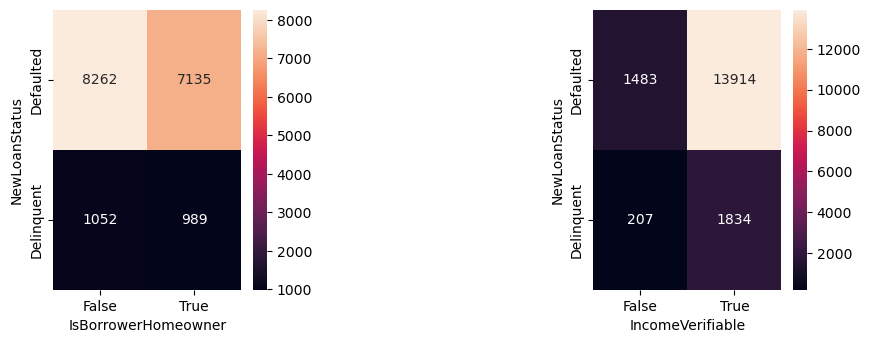

In [55]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.heatmap(homeowner, annot = True, fmt = 'd')

plt.subplot(2,2,2)
sns.heatmap(verifiedincome, annot = True, fmt = '.0f')

# Add whitespace between the subplots
plt.subplots_adjust(wspace=1.3)


 Non homeowners with verified income are delinquent and default more on their loan repayment.

#### Further investigation into relationship between variables

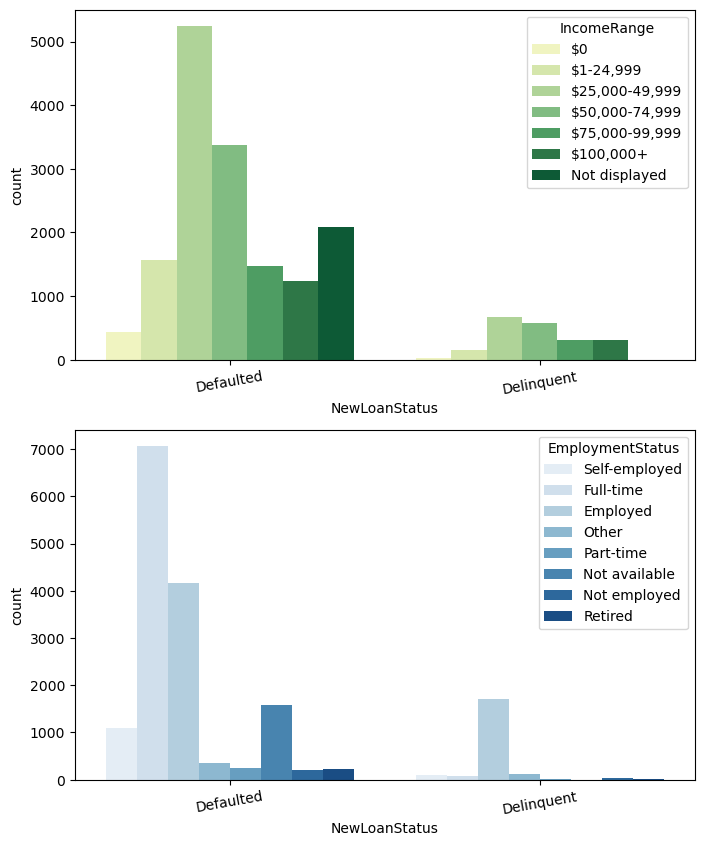

In [56]:
plt.figure(figsize = [8, 10])

# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sns.countplot(data = new_viz, x = 'NewLoanStatus', hue = 'IncomeRange', palette = 'YlGn')
plt.xticks(rotation=10)

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sns.countplot(data = new_viz, x = 'NewLoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
plt.xticks(rotation=10);

Income range earners between 50k and 74k USD default on their loan repayment while 25k to 49K income earners are delinquent.

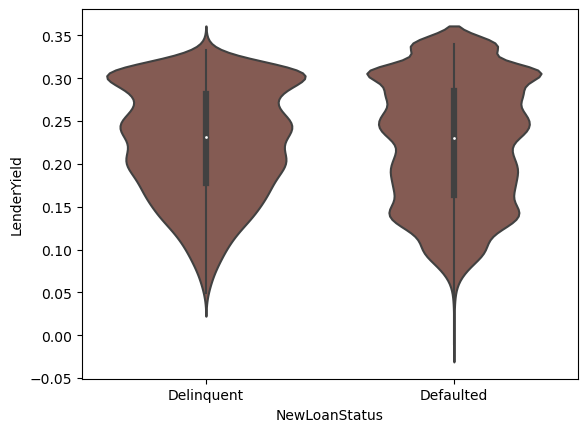

In [57]:
loans = [ 'Delinquent', 'Defaulted']

# Returns loan status with the categories and orderedness
classes = pd.api.types.CategoricalDtype(ordered=True, categories=loans)

# Use pandas.astype() to convert the "NewLoanStatus" column from a plain object type into an ordered categorical type 
viz['NewLoanStatus'] = viz['NewLoanStatus'].astype(classes);

base_color = sns.color_palette()[5]
sns.violinplot(data=viz, x='NewLoanStatus', y='LenderYield', color = base_color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


1. There is a low negative correlation between borrower rate and loan original amount.
2. There is also a low negative correlation between loan original and lender yield. This can be accounted for by the relationship between loan original amount and interest rate. The lower the interest rate, the lower the lender yield.
3. There is a weak positive correlation between lender yield and delinquencies. 
4. Home owners with verified income tend to default more on their loans

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes. A negative correlation between credit score ranges and borrower rate(-0.48) and lender yield(-0.47)

### Multivariate plots

#### Lender yield versus year and loan status

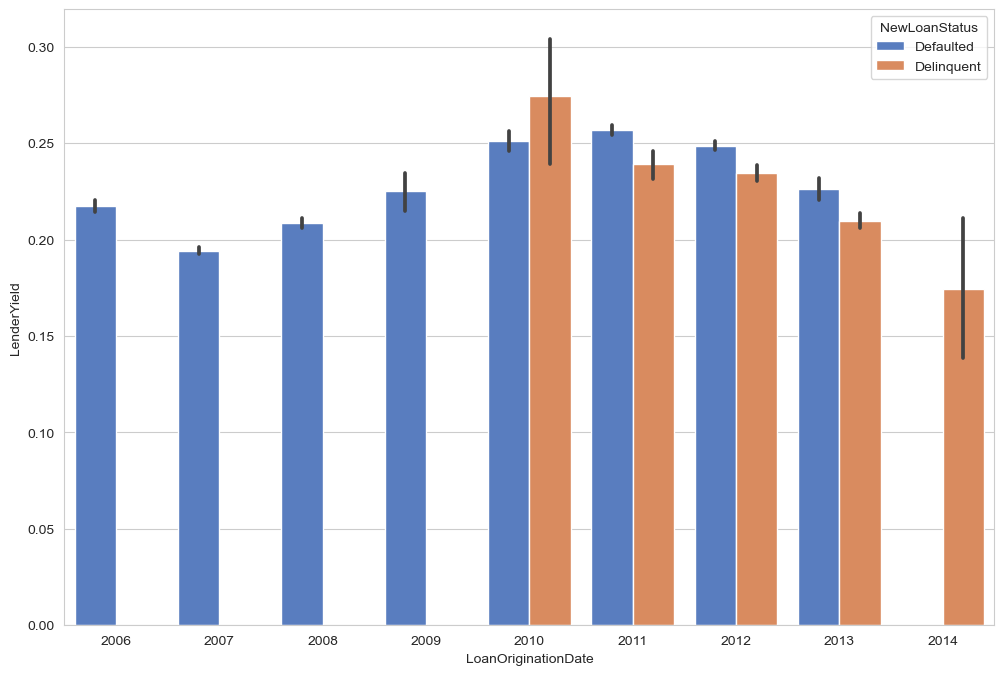

In [58]:
plt.figure(figsize = (12,8))
sns.set_style("whitegrid")
sns.barplot(x=new_viz['LoanOriginationDate'].dt.year, y="LenderYield", hue="NewLoanStatus", data=new_viz, palette="muted");


From the plot, it can be noticed that delinquency first appeared in 2010 and that was the highest seen in the first 9 years; It has decreased steadily too since then. It can also be seen that borrowers over the years tend to default on their loans. But I'm curious about what could have caused the abrupt seizure in defaulted loan repayment in 2014.

#### Loan amount versus year and loans status

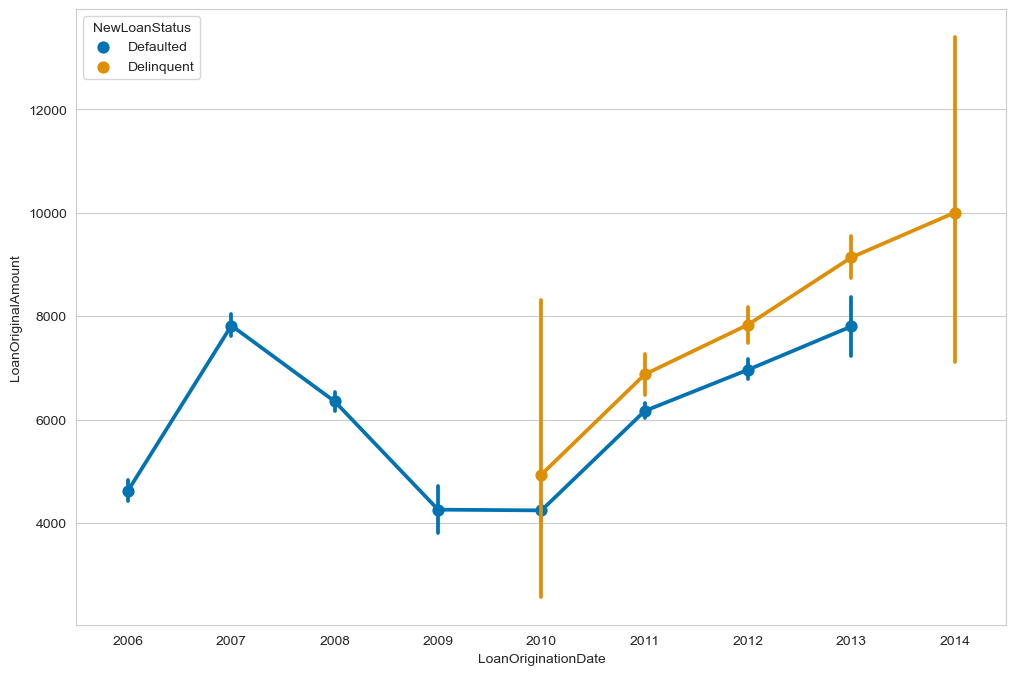

In [59]:
plt.figure(figsize = (12,8))
sns.pointplot(data = new_viz, x = new_viz['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'NewLoanStatus', 
             palette = 'colorblind');

This plot shows the rise and fall in loan amount given to borrowers in the first few years after inception of which after that there has been a steady increase in the amount of loan given to borrowers. And also as the loan amount increases over the years, so does the number of delinquent and defaulted borrowers.

#### Income range versus interest rate and loan status

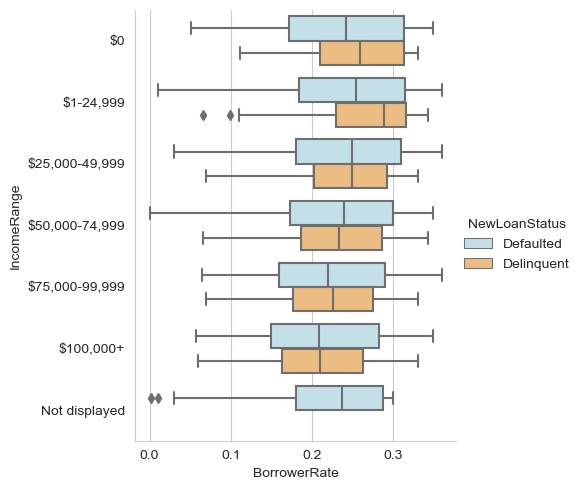

In [61]:
sns.catplot(y = 'IncomeRange', x = 'BorrowerRate', hue = 'NewLoanStatus', kind = 'box', data = new_viz, palette = 'RdYlBu_r');


In [ ]:
# Storing my data frame for use in explanatory visualization.
new_viz.to_csv('visuals.csv',index = False)
viz.to_csv('visuals1.csv',index = False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


I observed that as loan amount increased over the years, so did the delinquency increase.

### Were there any interesting or surprising interactions between features?

As stated earlier, as the company grew, the rate of delinquency and default on loan payment also grew.

### Conclusions

This exploratory analysis was aimed at uncovering the demographics,motivations of borrowers and also the effect delinquency has on lenders yield. The analysis was narrowed to borrowers who were defaulters of any degree.

1. From the analysis, it was discovered that a great percentage of borrowers are full time employees non homeowners mostly from California with verified monthly income of about 5000USD and an employment duration of about 4 years.

2. As the years increase, there is also a fair increase in the number of defaulters in loan repayment. 


### Limitations


There was a substantial presence of missing data in our analysis. 

For this analysis, I have mainly explored the correlation between several features, I cannot certainly say that one feature causes the other to happen. 